In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"E:\DataScience-data\combined_cycle_power_plant.csv",sep=';')

In [6]:
df.shape

(9568, 5)

In [7]:
df.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   ambient_pressure   9568 non-null   float64
 3   relative_humidity  9568 non-null   float64
 4   energy_output      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
df.columns

Index(['temperature', 'exhaust_vacuum', 'ambient_pressure',
       'relative_humidity', 'energy_output'],
      dtype='object')

In [13]:
df.tail(8)

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
9560,25.84,69.14,1009.22,88.47,431.35
9561,21.90,63.13,1011.54,81.83,447.40
9562,21.85,63.86,1020.16,68.84,445.62
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [14]:
con=['temperature', 'exhaust_vacuum', 'ambient_pressure',
       'relative_humidity']

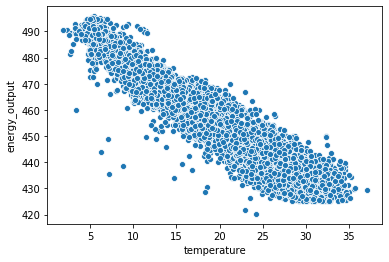

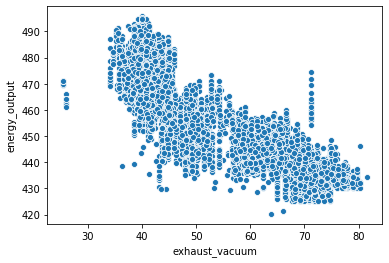

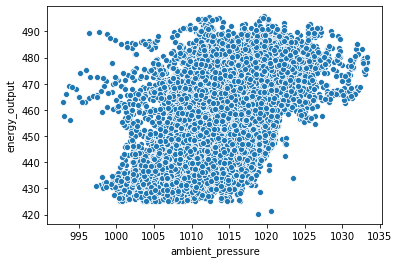

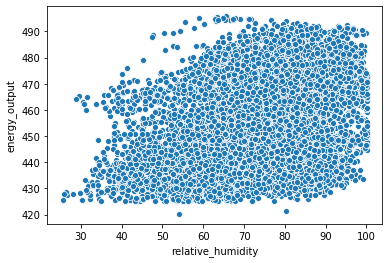

In [15]:
for i in con:
    sns.scatterplot(i,'energy_output',data=df)
    plt.show()

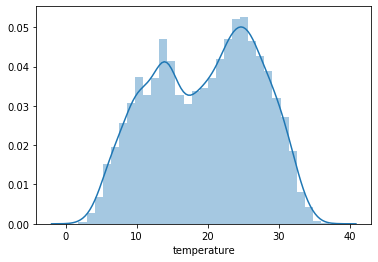

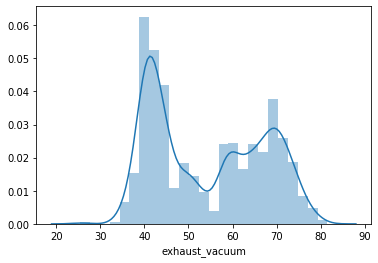

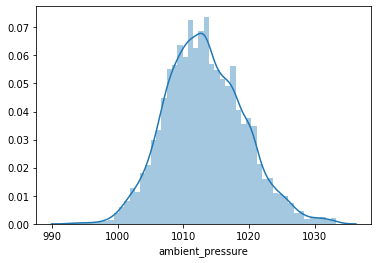

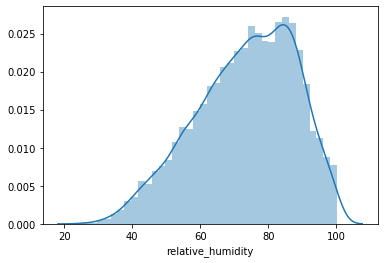

In [17]:
for i in con:
    sns.distplot(df[i])
    plt.show()

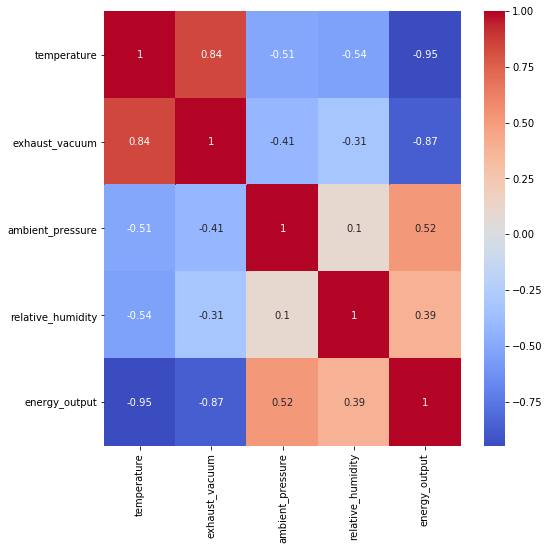

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [20]:
x=df.drop('energy_output',axis=1)
y=df['energy_output']

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [22]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(9568, 4)
(7654, 4)
(1914, 4)


In [23]:
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(9568,)
(7654,)
(1914,)


In [24]:
from sklearn.linear_model import LinearRegression
algo=LinearRegression()

In [25]:
algo.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
pred=algo.predict(xtest)

In [27]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ytest,pred))

20.04677597896731


In [29]:
import joblib


In [31]:
joblib.dump(algo,"E:\DataScience-data\CCPP.pkl")

['E:\\DataScience-data\\CCPP.pkl']

In [32]:
new_data=np.array([[31.25,69,1000,36]])
algo.predict(new_data)

array([433.07066617])

In [33]:
algo.intercept_

451.58911662348714

In [34]:
algo.coef_

array([-1.97659859, -0.23343822,  0.06506248, -0.158472  ])